In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor 

In [102]:
df=pd.read_csv('D:\\DataScience\\Data\\real_drug_dataset.csv',index_col='Patient_ID')

In [103]:
df.head()

,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score
Patient_ID,,,,,,,,
P0001,56,Male,Infection,Ciprofloxacin,50,9,Nausea,8.5
P0002,69,Male,Hypertension,Metoprolol,500,24,Tiredness,8.7
P0003,46,Female,Depression,Bupropion,100,25,Dry mouth,5.4
P0004,32,Male,Diabetes,Glipizide,850,44,Low blood sugar,6.4
P0005,60,Male,Depression,Bupropion,850,35,Anxiety,5.3


In [104]:
df.tail()

,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score
Patient_ID,,,,,,,,
P0996,18,Male,Hypertension,Losartan,100,44,Headache,7.7
P0997,35,Female,Infection,Azithromycin,50,15,Nausea,5.3
P0998,49,Female,Depression,Sertraline,850,52,Dry mouth,8.0
P0999,64,Male,Depression,Escitalopram,850,36,Nausea,7.6
P1000,66,Female,Hypertension,Metoprolol,500,58,Tiredness,6.5


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, P0001 to P1000
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Gender                   1000 non-null   object 
 2   Condition                1000 non-null   object 
 3   Drug_Name                1000 non-null   object 
 4   Dosage_mg                1000 non-null   int64  
 5   Treatment_Duration_days  1000 non-null   int64  
 6   Side_Effects             1000 non-null   object 
 7   Improvement_Score        1000 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 70.3+ KB


In [106]:
categogy=['Gender','Side_Effects']
for col in categogy:
    df[col]=df[col].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, P0001 to P1000
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Gender                   1000 non-null   int8   
 2   Condition                1000 non-null   object 
 3   Drug_Name                1000 non-null   object 
 4   Dosage_mg                1000 non-null   int64  
 5   Treatment_Duration_days  1000 non-null   int64  
 6   Side_Effects             1000 non-null   int8   
 7   Improvement_Score        1000 non-null   float64
dtypes: float64(1), int64(3), int8(2), object(2)
memory usage: 56.6+ KB


In [107]:
onhot=['Condition','Drug_Name']
df=pd.get_dummies(df,columns=onhot,drop_first=True)
df.head()

,Age,Gender,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score,Condition_Diabetes,Condition_Hypertension,Condition_Infection,Condition_Pain Relief,Drug_Name_Amoxicillin,Drug_Name_Azithromycin,Drug_Name_Bupropion,Drug_Name_Ciprofloxacin,Drug_Name_Escitalopram,Drug_Name_Glipizide,Drug_Name_Ibuprofen,Drug_Name_Insulin Glargine,Drug_Name_Losartan,Drug_Name_Metformin,Drug_Name_Metoprolol,Drug_Name_Paracetamol,Drug_Name_Sertraline,Drug_Name_Tramadol
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,
P0001,56,1,50,9,19,8.5,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
P0002,69,1,500,24,28,8.7,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
P0003,46,0,100,25,9,5.4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
P0004,32,1,850,44,17,6.4,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
P0005,60,1,850,35,2,5.3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [108]:
df.replace({'True':1,'False':0},inplace=True)

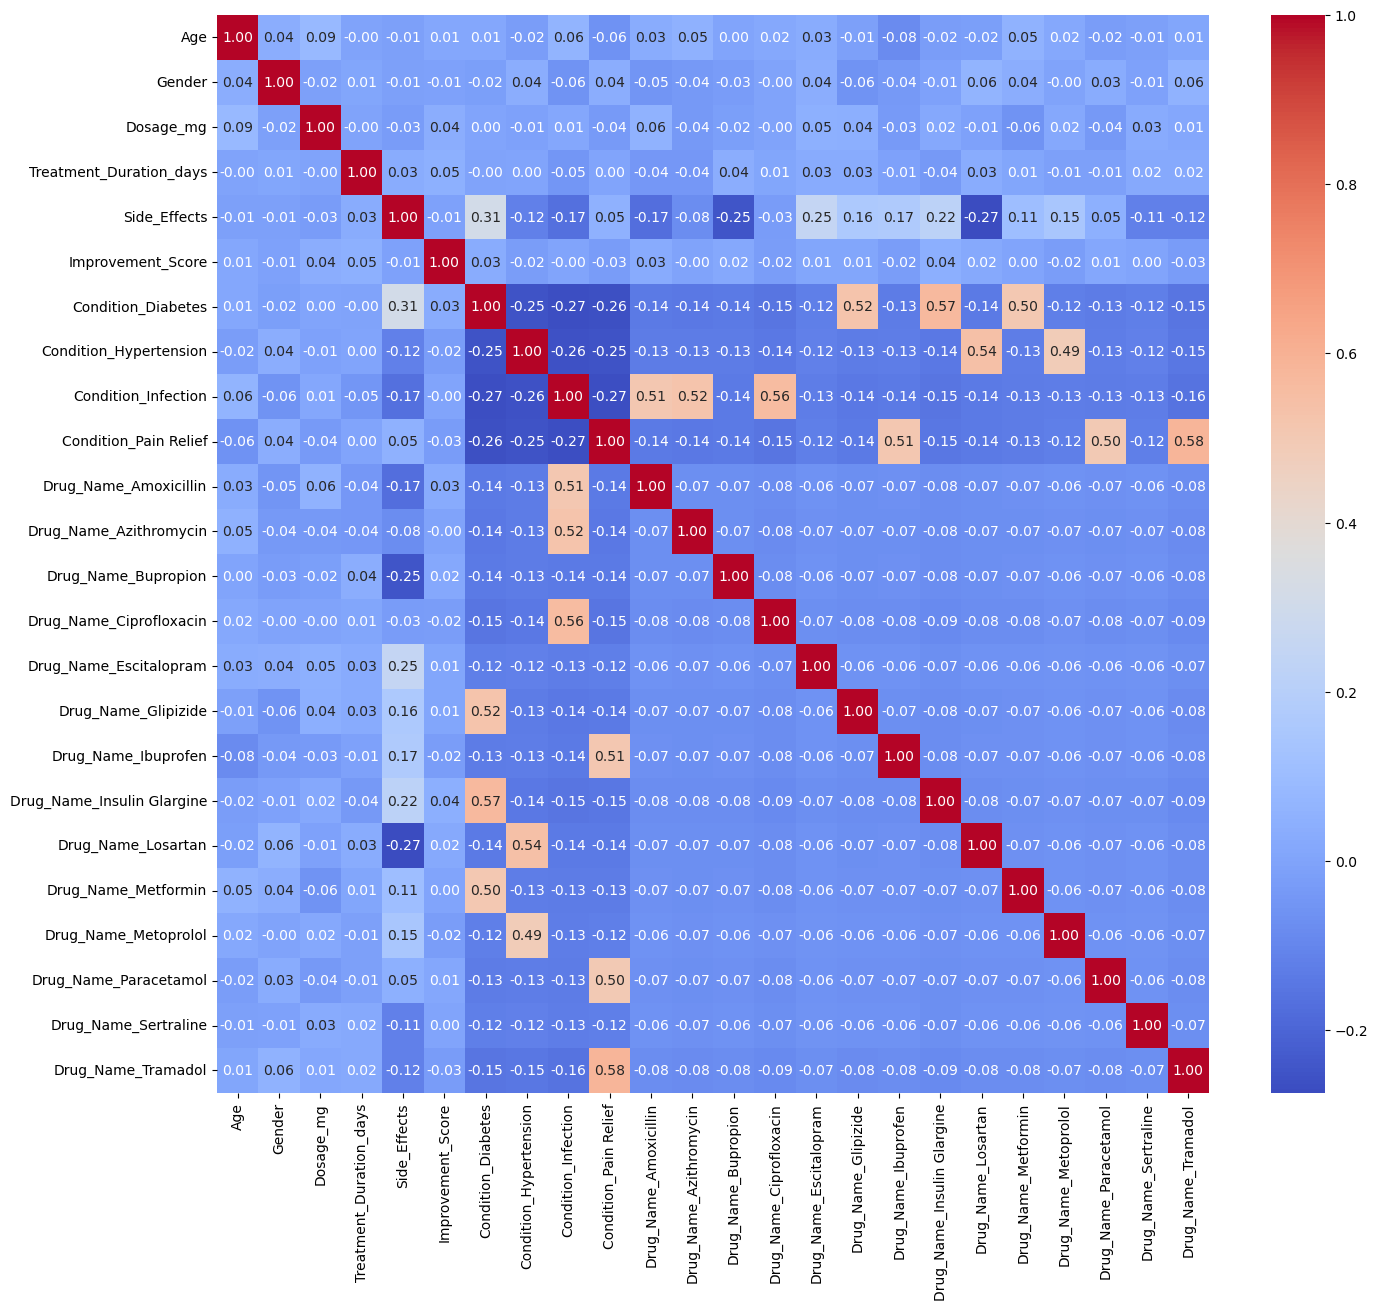

In [109]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [110]:
X=df.drop('Improvement_Score',axis=1)
y=df['Improvement_Score']

In [111]:
X.head()

,Age,Gender,Dosage_mg,Treatment_Duration_days,Side_Effects,Condition_Diabetes,Condition_Hypertension,Condition_Infection,Condition_Pain Relief,Drug_Name_Amoxicillin,Drug_Name_Azithromycin,Drug_Name_Bupropion,Drug_Name_Ciprofloxacin,Drug_Name_Escitalopram,Drug_Name_Glipizide,Drug_Name_Ibuprofen,Drug_Name_Insulin Glargine,Drug_Name_Losartan,Drug_Name_Metformin,Drug_Name_Metoprolol,Drug_Name_Paracetamol,Drug_Name_Sertraline,Drug_Name_Tramadol
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,
P0001,56,1,50,9,19,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
P0002,69,1,500,24,28,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
P0003,46,0,100,25,9,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
P0004,32,1,850,44,17,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
P0005,60,1,850,35,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [112]:
y.head()

Patient_ID
P0001    8.5
P0002    8.7
P0003    5.4
P0004    6.4
P0005    5.3
Name: Improvement_Score, dtype: float64

In [113]:
X.shape

(1000, 23)

In [114]:
y.shape

(1000,)

In [115]:
xgb=XGBRegressor(n_learning_rate=0.05,max_depth=20,n_estimators=1000,n_jobs=-1,random_state=42)
rf=RandomForestRegressor(n_estimators=1000,max_depth=20,n_jobs=-1,random_state=42)

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
xgb.fit(X_train,y_train)
rf.fit(X_train,y_train)

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [20:30:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "n_learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomForestRegressor(max_depth=20, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [117]:
y_pred_xgb=xgb.fit(X_train,y_train).predict(X_test)
y_pred_rf=rf.fit(X_train,y_train).predict(X_test)

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [20:30:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "n_learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [118]:
score_xgb=xgb.score(X_test,y_test)
score_rf=rf.score(X_test,y_test)
score_xgb,score_rf

(-0.4548647755653421, -0.06679398568130135)

In [119]:
model=VotingRegressor(estimators=[('xgb',xgb),('rf',rf)])
model.fit(X_train,y_train)

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [20:30:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "n_learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constrain...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=20,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=-1,
                                          n_learning_rate=0.05, ...)),
                            ('rf',
                             RandomForestRegressor(max_depth=20,
                                                   n_estimators=1000, n_jobs=-1,
                                                   random_state=42))])

In [120]:
score=model.score(X_test,y_test)
score

-0.20898665570573227

In [121]:
y_pred=model.predict(X_test)

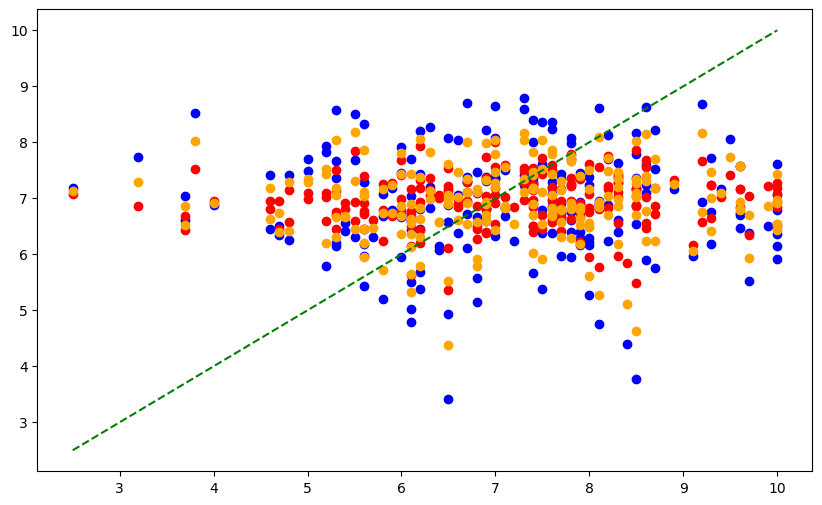

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_xgb,color='blue',label='XGB Predictions')
plt.scatter(y_test,y_pred_rf,color='red',label='RF Predictions')
plt.scatter(y_test,y_pred,color='orange',label='Ensembled Predictions')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='green',linestyle='--',label='Ideal Predictions')
plt.show()